## Sport Injuries Data Exploration

### imports

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

date_cols = [2, 19, 20, 26, 29, 30]
injuries = pd.read_csv('data/injuries_cleaned.csv', parse_dates=date_cols)


### Dataframe Exploration

In [ ]:
injuries_df = injuries.copy()
print(injuries_df.shape)
print(injuries_df.info())
injuries_df.head()

In [ ]:
injuries['DaysInjured'].describe()


In [ ]:
### Number of Injuries by Categories

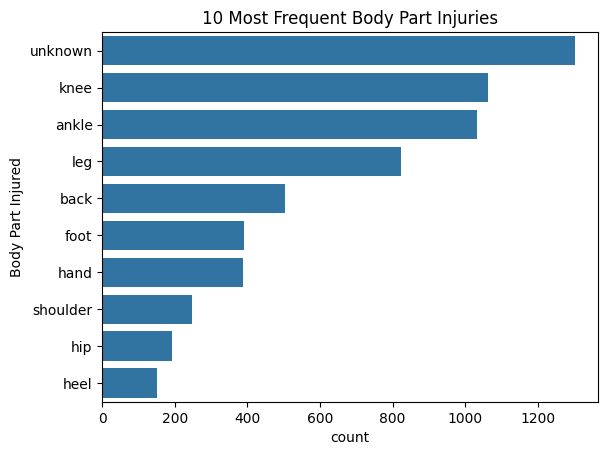

In [16]:
def injuries_dist_cat(col):
    count_df = injuries_df[col].value_counts().head(10)
    sns.barplot(x=count_df, y=count_df.index)


injuries_dist_cat('main_body_part')
plt.title('10 Most Frequent Body Part Injuries')
plt.ylabel('Body Part Injured')
plt.show()


### Numeric Ditributions

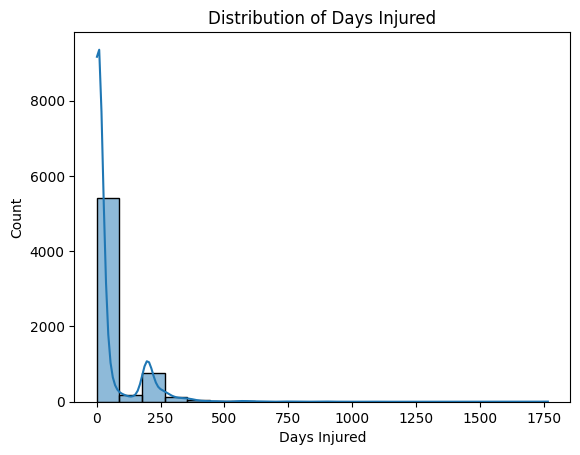

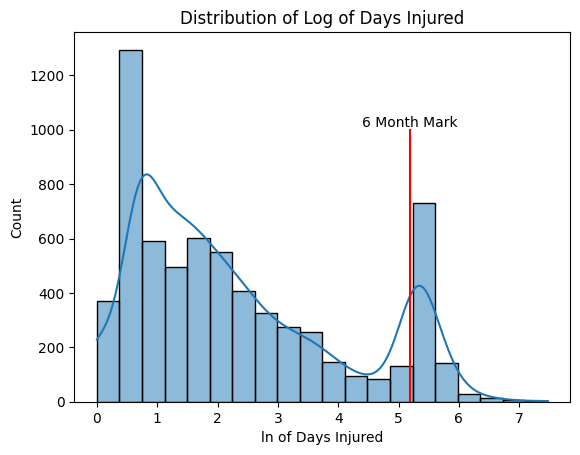

In [9]:

sns.histplot(data=injuries_df, x='DaysInjured', bins=20, kde=True)
plt.title('Distribution of Days Injured')
plt.xlabel('Days Injured')
plt.ylabel('Count')
plt.show() 

sns.histplot(data=injuries_df, x='log_days_injured', bins=20, kde=True)
t = np.log(30*6)
plt.plot([t, t], [0, 1000], color='#FF0000')
plt.text(t, 1010, '6 Month Mark', ha='center')
plt.title('Distribution of Log of Days Injured')
plt.xlabel('ln of Days Injured')
plt.ylabel('Count')
plt.show() 


In [ ]:
# sns.displot(data=injuries_df, x='age_at_injury', y='log_days_injured', kind='kde')


In [ ]:
order = injuries_df.groupby('BodyPartInjured').log_days_injured.median().sort_values(ascending=False).index

top_5 = order[0:]
plt.figure(figsize=(6, 4))
sns.boxplot(data=injuries_df[injuries_df['BodyPartInjured'].isin(top_5)], y='BodyPartInjured', x='log_days_injured', order=top_5)
plt.show()


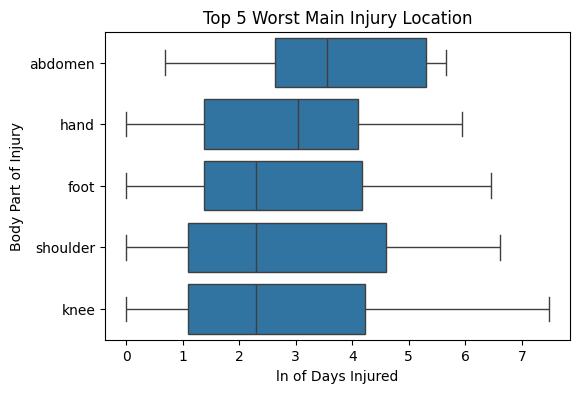

In [8]:
order = injuries_df.groupby('main_body_part').log_days_injured.median().sort_values(ascending=False).index

top_5 = order[0:5]
plt.figure(figsize=(6, 4))
sns.boxplot(data=injuries_df[injuries_df['main_body_part'].isin(top_5)], y='main_body_part', x='log_days_injured', order=top_5)
plt.title('Top 5 Worst Main Injury Location')
plt.xlabel('ln of Days Injured')
plt.ylabel('Body Part of Injury')
plt.show()

In [ ]:
part_counts = injuries_df['BodyPartInjured'].value_counts()
high_count = part_counts.index[part_counts >= 250]
high_count_df = injuries_df[injuries_df['BodyPartInjured'].isin(high_count)]
order = high_count_df.groupby('BodyPartInjured').remaining_days.median().sort_values(ascending=True).index

plt.figure(figsize=(5, 15))
sns.boxplot(data=high_count_df, y='BodyPartInjured', x='remaining_days', order=order)
plt.show()
injuries_df['BodyPartInjured'].value_counts()

In [ ]:
sns.boxplot(data=injuries[injuries['broken'] | injuries['bruise']], x='log_days_injured', hue='broken')
plt.title('Bruise Better than Broken')
plt.xlabel('ln Days Injured')
plt.legend(title='', labels=['Bruised', 'Broken'])
plt.show()